# SERA Optimization Climate Results

In [1]:
import pandas as pd
import os
import sys

import numpy as np

In [2]:
# Add the folder to the Python path

os.chdir("../")
# change working directory to project's root path
print(os.getcwd())

folder_path = os.path.abspath("functions/") #INPUT_PATH)#'path_to_your_folder')  # Replace with the actual folder path
sys.path.insert(0, folder_path)

from Predictions import (
    get_info_experiment,
    summarize_best_results_by_index,
    plot_average_best_results,
    plot_best_results_per_season,
    PredictionExperiment
)

c:\Users\marti\Desktop\data\hw_extra


c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [3]:
def train_single_label_exp(exp_id, season, label_interest, model_exp, name_model, region):
    labels_to_remove = ["HWN", "HWF", "HWD", "HWA", "HWM"]
    labels_to_remove.remove(label_interest)
    display(get_info_experiment(exp_id, metadata_exp_path=metadata_exp_path, metadata_index_path=my_indices_path, extra_indices_path=extra_indices_path))
    data = {season: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{season}.parquet")}
    data[season].drop(columns=labels_to_remove, inplace=True)
    experiment_1 = PredictionExperiment(data, [label_interest], [model_exp], [name_model], 5, id)
    experiment_1.execute_experiment()
    experiment_1.get_metrics("r2", stage="TSCV", show=False)
    experiment_1.get_metrics("mape", stage="TSCV", show=False)
    display(experiment_1.results)
    return experiment_1

def display_full(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', '{:,.2f}'.format):  # more options can be specified also
        display(df)

In [4]:
my_indices_path = "data/my_indices/metadata.csv"
extra_indices_path = "data/extra_indices/metadata.csv"

## Chile

In [5]:
region = "chile"
metadata_exp_path = f"data/climate_features/{region}/metadata.csv"
metadata = pd.read_csv(metadata_exp_path)
metadata.rename(columns={"id":"id_data"}, inplace=True)
metadata

,id_data,filename,season,indices
0,978f49d7,predictor_978f49d7_1.parquet,1,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
1,978f49d7,predictor_978f49d7_2.parquet,2,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
2,978f49d7,predictor_978f49d7_3.parquet,3,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
3,978f49d7,predictor_978f49d7_4.parquet,4,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
4,978f49d7,predictor_978f49d7_5.parquet,5,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
...,...,...,...,...
247,458d357c,predictor_458d357c_8.parquet,8,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
248,458d357c,predictor_458d357c_9.parquet,9,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
249,458d357c,predictor_458d357c_10.parquet,10,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
250,458d357c,predictor_458d357c_11.parquet,11,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...


In [6]:
results = pd.read_csv(f"data/sera_results_year_v2/{region}_results/results.csv")
results

,model,season,Bounds,I_w,metric,stage,HWN,HWF,HWD,HWM,HWA,Average,id_data
0,CXGB15,1,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,r2,prediction,0.090659,0.048717,0.127539,0.152901,0.148157,0.113595,978f49d7
1,RNN16,1,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,r2,prediction,0.006273,0.039445,-0.012402,-0.107032,-0.053980,-0.025539,978f49d7
2,LSTM16,1,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,r2,prediction,0.107038,0.071454,-0.012971,0.084747,0.111485,0.072350,978f49d7
3,CNNRNN16,1,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,r2,prediction,0.160915,0.144719,0.087034,0.197462,0.216236,0.161273,978f49d7
4,MLP16,1,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,r2,prediction,0.019697,0.064238,0.036577,-0.018918,-0.020755,0.016168,978f49d7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,CXGB15,1,-1.1692892810242344|-0.30647585455315646|4.561...,0.3,sera,TSCV,39.486588,45.300100,35.267403,36.958421,36.678603,38.738223,458d357c
3356,RNN16,1,-1.1692892810242344|-0.30647585455315646|4.561...,0.3,sera,TSCV,162.788033,162.788033,162.788033,162.788033,162.788033,162.788033,458d357c
3357,LSTM16,1,-1.1692892810242344|-0.30647585455315646|4.561...,0.3,sera,TSCV,179.661107,179.661107,179.661107,179.661107,179.661107,179.661107,458d357c
3358,CNNRNN16,1,-1.1692892810242344|-0.30647585455315646|4.561...,0.3,sera,TSCV,186.420561,186.420561,186.420561,186.420561,186.420561,186.420561,458d357c


In [7]:
# Example usage
summary_sera = summarize_best_results_by_index(results, metadata, metric="sera", top_n=3, stage="prediction", sera=True)
summary_cv_sera = summarize_best_results_by_index(results, metadata, metric="sera", top_n=3, stage="CV", sera=True)
summary_tscv_sera = summarize_best_results_by_index(results, metadata, metric="sera", top_n=3, stage="TSCV", sera=True)
# Example usage
summary_mae = summarize_best_results_by_index(results, metadata, metric="mae", top_n=3, stage="prediction", sera=True)
summary_cv_mae = summarize_best_results_by_index(results, metadata, metric="mae", top_n=3, stage="CV", sera=True)
summary_tscv_mae = summarize_best_results_by_index(results, metadata, metric="mae", top_n=3, stage="TSCV", sera=True)

In [8]:
summary_cv_mae

,model,season,id_data,Bounds,I_w,index,best_value,filename,indices
0,RNN16,1,458d357c,-1.1692892810242344|-0.30647585455315646|4.561...,0.3,Average,0.643157,predictor_458d357c_1.parquet,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
1,MLP16,1,8c95fd00,-1.1692892810242344|-0.30647585455315646|4.561...,0.3,Average,0.646153,predictor_8c95fd00_1.parquet,fde0e327-340e2882-8c5bce37-880b8b63-aa75d48e-8...
2,LSTM16,1,3832cbd6,-1.1692892810242344|-0.30647585455315646|4.561...,0.3,Average,0.648529,predictor_3832cbd6_1.parquet,fde0e327-340e2882-13e2f761-aa75d48e-2748fd3a-f...
3,LSTM16,1,8c95fd00,-1.1692892810242344|-0.30647585455315646|4.561...,0.3,HWA,0.654525,predictor_8c95fd00_1.parquet,fde0e327-340e2882-8c5bce37-880b8b63-aa75d48e-8...
4,LSTM16,1,8c95fd00,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,HWA,0.657499,predictor_8c95fd00_1.parquet,fde0e327-340e2882-8c5bce37-880b8b63-aa75d48e-8...
5,LSTM16,1,3832cbd6,-1.1692892810242344|-0.30647585455315646|4.561...,0.3,HWA,0.659667,predictor_3832cbd6_1.parquet,fde0e327-340e2882-13e2f761-aa75d48e-2748fd3a-f...
6,MLP16,1,8c95fd00,-1.1692892810242344|-0.30647585455315646|4.561...,0.3,HWD,0.645972,predictor_8c95fd00_1.parquet,fde0e327-340e2882-8c5bce37-880b8b63-aa75d48e-8...
7,RNN16,1,458d357c,-1.1692892810242344|-0.30647585455315646|4.561...,0.3,HWD,0.658059,predictor_458d357c_1.parquet,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
8,LSTM16,1,3832cbd6,-1.1692892810242344|-0.30647585455315646|4.561...,0.3,HWD,0.660345,predictor_3832cbd6_1.parquet,fde0e327-340e2882-13e2f761-aa75d48e-2748fd3a-f...
9,RNN16,1,458d357c,-1.1692892810242344|-0.30647585455315646|4.561...,0.3,HWF,0.610892,predictor_458d357c_1.parquet,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...


In [9]:
ids_metadata = metadata["id_data"].unique()
ids_best_results = np.concatenate((
    summary_cv_sera["id_data"].unique(),
    summary_tscv_mae["id_data"].unique(),
    summary_cv_mae["id_data"].unique(),
    summary_tscv_sera["id_data"].unique()
    )
)
ids_best_results = np.unique(ids_best_results)
print("Total experiments:", ids_metadata)
print("Best id experiments:", ids_best_results)
print("'Bad' Experiments:", [id for id in ids_metadata if id not in ids_best_results] )

Total experiments: ['978f49d7' '69ae08a8' '1b939ac5' '50a3f070' '4d17ba1a' '3adff093'
 'b33fc639' '511854f2' '9bd58418' 'd7101242' '3832cbd6' '3df87a13'
 '30ab9bad' '311dd366' '8c95fd00' '9f8163e4' '4effa258' '13a24caf'
 '8359c65d' 'ecf2577f' '458d357c']
Best id experiments: ['30ab9bad' '3832cbd6' '3df87a13' '458d357c' '8c95fd00' '9bd58418'
 '9f8163e4' 'd7101242' 'ecf2577f']
'Bad' Experiments: ['978f49d7', '69ae08a8', '1b939ac5', '50a3f070', '4d17ba1a', '3adff093', 'b33fc639', '511854f2', '311dd366', '4effa258', '13a24caf', '8359c65d']


In [10]:
ids_best_results = pd.concat((
    summary_mae["id_data"],
    summary_cv_mae["id_data"],
    summary_tscv_mae["id_data"]
    )
)
ids_best_results.value_counts()

id_data
3832cbd6    21
b33fc639     7
8c95fd00     7
d7101242     5
458d357c     5
30ab9bad     4
4d17ba1a     2
ecf2577f     2
9f8163e4     1
Name: count, dtype: int64

In [11]:
ids_best_results = pd.concat((
    summary_sera["id_data"],
    summary_cv_sera["id_data"],
    summary_tscv_sera["id_data"]
    )
)
ids_best_results.value_counts()

id_data
3832cbd6    12
ecf2577f    11
9bd58418     8
9f8163e4     5
30ab9bad     5
d7101242     4
311dd366     3
8c95fd00     3
978f49d7     2
3df87a13     1
Name: count, dtype: int64

In [12]:
import xarray as xr
import pandas as pd
import os
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from metpy.calc import advection
from metpy.units import units


In [13]:
data_single = xr.load_dataset("data/local_data/7means_east_pacific.nc")


Lets check on the most frequent experiment among all month results

In [14]:
get_info_experiment("8c95fd00" , metadata_exp_path=metadata_exp_path, metadata_index_path=my_indices_path, extra_indices_path=extra_indices_path)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
8c5bce37,index_8c5bce37.parquet,anom,1,T,286|288|-42|-33,1980-2010,1972-2022
880b8b63,index_880b8b63.parquet,max,1,MSL,260|284|-44|-17,NoRef,1972-2022
aa75d48e,index_aa75d48e.parquet,anom,1,U,287|289|-42|-33,1980-2010,1972-2022
88249a81,index_88249a81.parquet,anom,1,MSL,286|292|-52|-40,1980-2010,1972-2022
f6e4a28a,index_f6e4a28a.parquet,anom,1,MSL,286|288.5|-33|-28,1980-2010,1972-2022
7728bf70,index_7728bf70.parquet,anom,1,MSL,280|286|-38|-30,1980-2010,1972-2022
a66b8219,index_a66b8219.parquet,anom,1,MSL,291|295|-38|-30,1980-2010,1972-2022


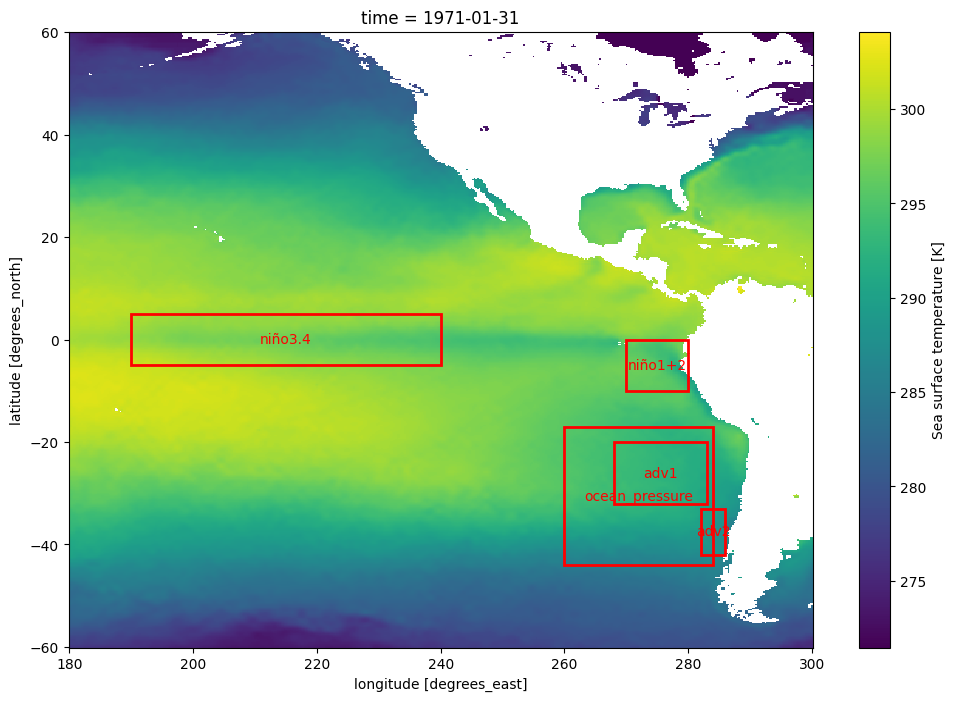

In [15]:
boxes_pacific = {
    "niño3.4": [190, 240, -5, 5],  # [lon_min, lon_max, lat_min, lat_max]
    "niño1+2": [270, 280, -10, 0],
    # "ocean_pressure": [260, 284, -55, -25], #study max over time and define region
    "ocean_pressure": [260, 284, -44, -17], #last defined ocean max pressure
    "adv1": [268,283,-32,-20],
    "adv2": [282,286,-42,-33]

    
    #"advección": [280, 285, -37, -30]
}

fig, ax = plt.subplots(figsize=(12, 8))

data_single.sst.isel(time=0).plot(ax=ax)

for box_id, coords in boxes_pacific.items():
    lon_min, lon_max, lat_min, lat_max = coords
    width = lon_max - lon_min
    height = lat_max - lat_min
    
    # Create rectangle patch
    rect = mpatches.Rectangle((lon_min, lat_min), width, height,
                             fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    
    # Optionally add a label
    ax.text(lon_min + width/2, lat_min + height/2, f"{box_id}", 
            ha='center', va='center', color='red')

plt.show()

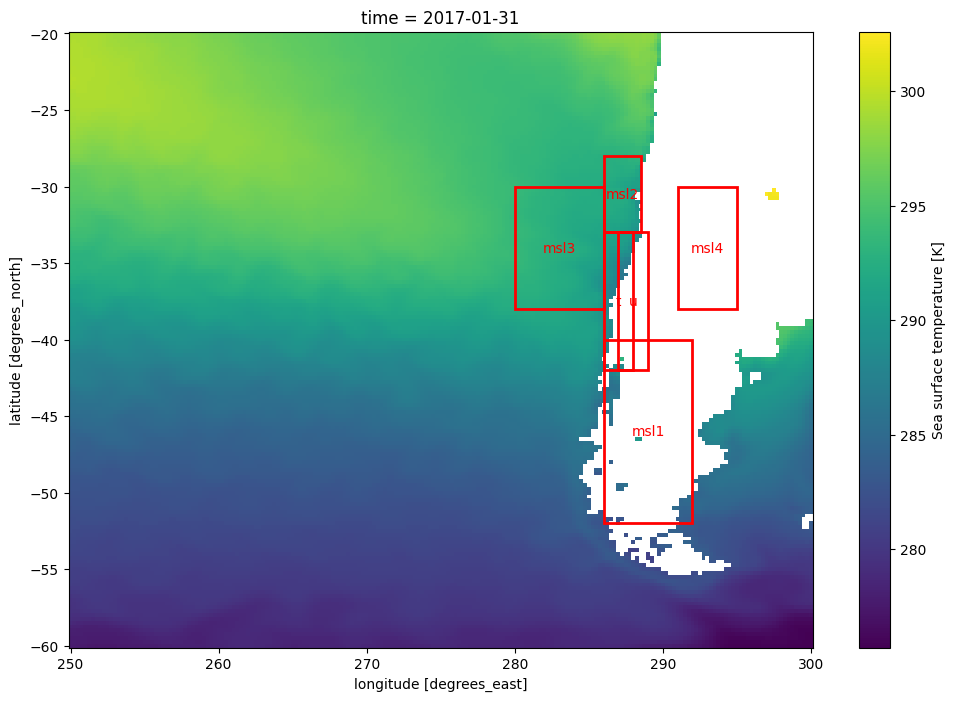

In [16]:
boxes_chile = {
    "u" : [287,289,-42,-33],
    "t": [286,288,-42,-33],
    "msl1": [286,292,-52,-40],
    "msl2": [286,288.5,-33,-28],
    "msl3": [280,286,-38,-30],
    "msl4": [291,295,-38,-30]
}

fig, ax = plt.subplots(figsize=(12, 8))

data_single.sel(longitude=slice(250,300), latitude=slice(-60,-20), time="2017-01").sst.plot(ax=ax)

for box_id, coords in boxes_chile.items():
    lon_min, lon_max, lat_min, lat_max = coords
    width = lon_max - lon_min
    height = lat_max - lat_min
    
    # Create rectangle patch
    rect = mpatches.Rectangle((lon_min, lat_min), width, height,
                             fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    
    # Optionally add a label
    ax.text(lon_min + width/2, lat_min + height/2, f"{box_id}", 
            ha='center', va='center', color='red')

plt.show()